# Proyecto 2B

## Alex Freire

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import networkx as nx
import heapq
import scipy
import scipy.optimize
import scipy.stats
%matplotlib inline
import re

In [2]:
data1 = pd.read_csv('.//data/supfinalv1.csv')
data1.shape

(6250, 24)

In [3]:
data2=json.load(open('.//data/sup5.json'))
#data2.shape

In [4]:
data2

[{'name': 'Air Wave II', 'gender': None, 'height': 0, 'superPowers': []},
 {'name': 'Captain America (Worthy) (MCU)',
  'gender': 'Male',
  'height': 0,
  'superPowers': ['Accelerated Healing',
   'Agility',
   'Electrokinesis',
   'Energy Armor',
   'Energy Blasts',
   'Energy Resistance',
   'Longevity',
   'Reflexes',
   'Stamina',
   'Stealth',
   'Super Speed',
   'Super Strength',
   'Teleportation',
   'Toxin and Disease Resistance',
   'Weapon-based Powers',
   'Weapons Master',
   'Weather Control',
   'Wind Control']},
 {'name': 'Agent K', 'gender': None, 'height': 0, 'superPowers': []},
 {'name': 'Anacondrai Serpent',
  'gender': 'Male',
  'height': 599,
  'superPowers': ['Accelerated Healing',
   'Agility',
   'Animal Attributes',
   'Animal Control',
   'Animal Oriented Powers',
   'Camouflage',
   'Cold Resistance',
   'Durability',
   'Endurance',
   'Energy Resistance',
   'Enhanced Hearing',
   'Enhanced Senses',
   'Enhanced Sight',
   'Enhanced Smell',
   'Enhanced T

In [5]:
g=nx.Graph()
for x in data2:
    for y in data2:
        if x!=y and len(set(x['superPowers']).intersection(set(y['superPowers'])))>0:
            g.add_edge(x['name'], y['name'])

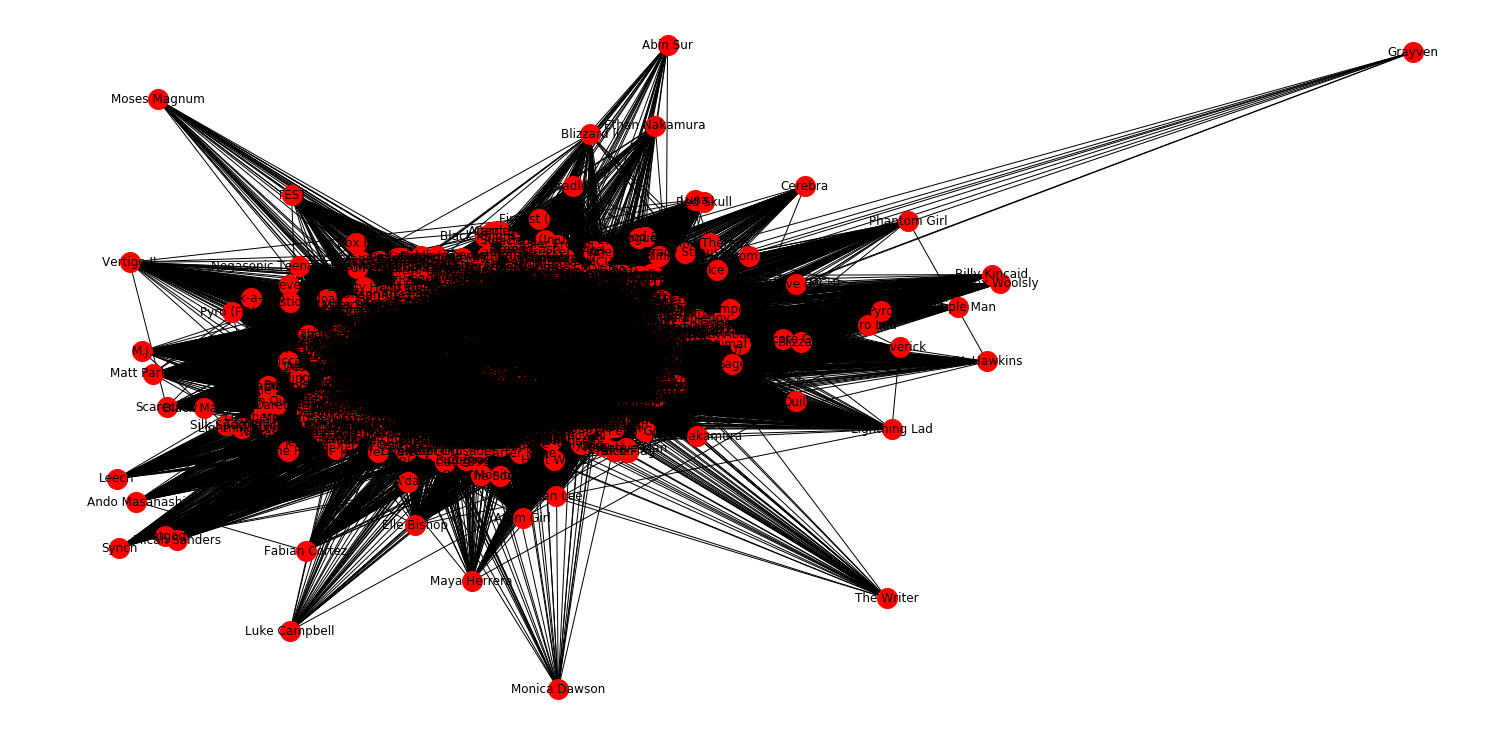

In [7]:
pos = nx.spring_layout(g)

plt.figure(figsize=(20,10))
nx.draw(g,pos=pos,with_labels=True,node_size=400,cmap=plt.cm.Blues)
plt.show()

In [10]:
data1

,name,teams,gender,height,race,weight,eyecolor,haircolor,fullname,alteregos,...,occupation,base,relatives,intelligence,strength,speed,durability,power,combat,superPowers
0,2B,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,"<div class=""stat-value"">102</div>","<div class=""stat-value""><span class=""infinite""...","<div class=""stat-value"">90</div>","<div class=""stat-value"">65</div>","<div class=""stat-value"">239</div>","<div class=""stat-value"">100</div>","Absorption,Accelerated Healing,Agility,Duplica..."
1,A2,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,"<div class=""stat-value"">102</div>","<div class=""stat-value""><span class=""infinite""...","<div class=""stat-value"">90</div>","<div class=""stat-value"">100</div>","<div class=""stat-value"">282</div>","<div class=""stat-value"">100</div>","Absorption,Accelerated Healing,Agility,Duplica..."
2,A.M.A.Z.O. (CW),NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Afterimage Creation,Cold Resistance,Cryokinesi..."
3,A.M.A.Z.O (CW),NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Absorption,Cryokinesis,Durability,Elasticity,E..."
4,Batgirl V,NaN,Female,0,NaN,NaN,NaN,NaN,Charlotte Gage-Radcliffe,\n,...,NaN,NaN,NaN,"<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>",NaN
5,Batgirl IV,NaN,Female,165,NaN,52.0,Green,Black,Cassandra Cain,\n,...,NaN,Gotham City; Bl�dhaven; Tibet; New York City,"David Cain (father), Lady Shiva (mother), Caro...",NaN,NaN,NaN,NaN,NaN,NaN,"Agility,Peak Human Condition,Stealth,Toxin and..."
6,Batman (LEGO),NaN,Male,3,NaN,1.0,White,No Hair,Bruce Wayne,\n,...,Superhero,Batcave,"Batgirl (Love interest), Alfred Pennyworth (Bu...",NaN,NaN,NaN,NaN,NaN,NaN,"Agility,Camouflage,Cold Resistance,Dimensional..."
7,Dragonborn,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,"<div class=""stat-value"">111</div>","<div class=""stat-value"">454</div>","<div class=""stat-value"">90</div>","<div class=""stat-value"">60</div>","<div class=""stat-value"">253</div>","<div class=""stat-value"">100</div>","Absorption,Agility,Animal Control,Durability,E..."
8,Dyna-Mite (BTBATB),NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,"<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>",NaN
9,Dragon Warrior,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,"<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>","<div class=""stat-value"">0</div>",NaN


In [11]:
intelligence=[]
strength=[]
speed=[]
durability=[]
power=[]
combat=[]

In [12]:
for i in range(0,6250):
    try:
        intelligence.append(int(re.findall(r'[0-9]+',data1['intelligence'][i])[0]))
    except:
        intelligence.append(0)
        
    try:
        strength.append(int(re.findall(r'[0-9]+',data1['strength'][i])[0]))
    except:
        strength.append(0)
        
    try:
        speed.append(int(re.findall(r'[0-9]+',data1['speed'][i])[0]))
    except:
        speed.append(0)
        
    try:
        durability.append(int(re.findall(r'[0-9]+',data1['durability'][i])[0]))
    except:
        durability.append(0)
        
    try:
        power.append(int(re.findall(r'[0-9]+',data1['power'][i])[0]))
    except:
        power.append(0)
        
    try:
        combat.append(int(re.findall(r'[0-9]+',data1['combat'][i])[0]))
    except:
        combat.append(0)

In [13]:
dataalternativo=data1

In [14]:
dataalternativo['intelligence']=intelligence
dataalternativo['strength']=strength
dataalternativo['speed']=speed
dataalternativo['durability']=durability
dataalternativo['power']=power
dataalternativo['combat']=combat

### Cantidad de superheroes en el dataset

In [12]:
nombreheroe=data1['name'].unique().tolist()
len(nombreheroe)

5863

### Altura de superheroes

In [248]:
filtro1=data1[data1['height']!=0]

In [249]:
filtro1

,name,teams,gender,height,race,weight,eyecolor,haircolor,fullname,alteregos,...,occupation,base,relatives,intelligence,strength,speed,durability,power,combat,superPowers
0,2B,NaN,Female,168,Android,0.0,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,100,282,100,"Absorption,Accelerated Healing,Agility,Duplica..."
1,A2,NaN,Female,168,Android,0.0,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,100,282,100,"Absorption,Accelerated Healing,Agility,Duplica..."
5,Batgirl IV,NaN,Female,165,NaN,52.0,Green,Black,Cassandra Cain,\n,...,NaN,Gotham City; Bl�dhaven; Tibet; New York City,"David Cain (father), Lady Shiva (mother), Caro...",0,0,0,100,282,100,"Agility,Peak Human Condition,Stealth,Toxin and..."
6,Batman (LEGO),NaN,Male,3,NaN,1.0,White,No Hair,Bruce Wayne,\n,...,Superhero,Batcave,"Batgirl (Love interest), Alfred Pennyworth (Bu...",0,0,0,100,282,100,"Agility,Camouflage,Cold Resistance,Dimensional..."
10,Ebony Maw (MCU),NaN,Male,178,NaN,79.0,Blue,No Hair,NaN,\n,...,NaN,NaN,NaN,0,0,0,100,282,100,"Element Control,Flight,Force Fields,Gravity Co..."
23,Jennifer Kale,NaN,Female,168,NaN,55.0,Blue,Blond,Jennifer Kale,\n,...,"Sorceress, student",NaN,"Andrew Jackson Kale (brother, deceased), Josh...",0,0,0,100,282,100,"Force Fields,Magic,Portal Creation"
48,Penance II,NaN,Male,183,NaN,89.0,Blue,Blond,Robert Baldwin,\n,...,"Government operative; former adventurer, reali...",NaN,"Justin Baldwin (father), Madeline Naylor (moth...",0,0,0,100,282,100,Energy Blasts
51,Peggy Carter (MCU),NaN,Female,170,NaN,68.0,Brown,Brown,Margaret Elizabeth Carter,\n,...,S.H.I.E.L.D.'s agent,"Winchester, Hampshire, England","Harrison Carter (father, deceased), Amanda Car...",0,0,0,100,282,100,"Agility,Durability,Endurance,Intelligence,Intu..."
55,Pavel Chekov,NaN,Male,168,Human,69.0,Brown,Brown,Pavel Andreievich Chekov,\n,...,NaN,NaN,NaN,0,0,0,100,282,100,NaN
56,Penguin,NaN,Male,157,NaN,79.0,Blue,Black,Oswald Chesterfield Cobblepot,\n,...,Trader,Gotham City,"Miranda Cobblepot (Aunt), Miranda (Mother, dec...",0,0,0,100,282,100,"Agility,Cold Resistance,Insanity,Intelligence,..."


In [253]:
filtronuevo1=filtro1.head(10).iloc[:,[0,3]]
filtronuevo1

,name,height
0,2B,168
1,A2,168
5,Batgirl IV,165
6,Batman (LEGO),3
10,Ebony Maw (MCU),178
23,Jennifer Kale,168
48,Penance II,183
51,Peggy Carter (MCU),170
55,Pavel Chekov,168
56,Penguin,157


Text(0.5, 1.0, 'Altura se superiores')

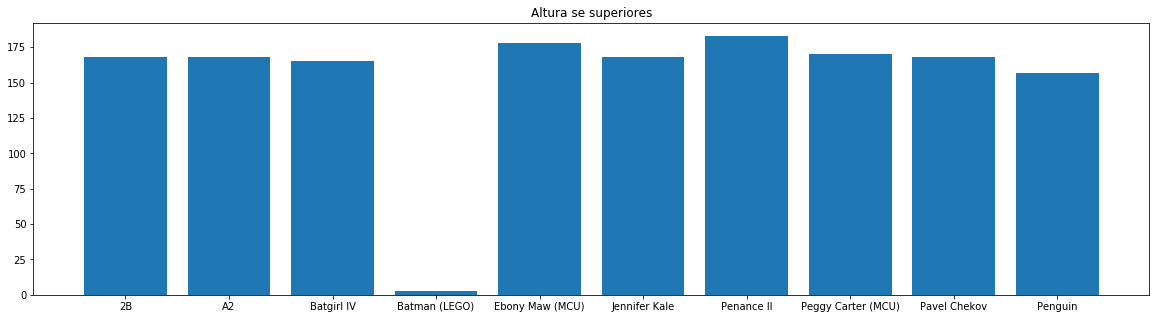

In [258]:
plt.figure(figsize=(20,5))
plt.bar(filtronuevo1.iloc[0:10,0].values.tolist(),filtronuevo1.iloc[0:10,1].values.tolist())
plt.title('Altura se superheroes')

### Altura maxima superheroe

In [26]:
data1.height.max()

998

In [28]:
data1[data1['height']==998]

,name,gender,height,superPowers
1,Acronix,Male,998,"Agility,Bullet Time,Clairvoyance,Durability,El..."
3208,Bolobo,Male,998,"Accelerated Healing,Agility,Camouflage,Cold Re..."
3422,Chamille,Female,998,"Agility,Camouflage,Changing Armor,Cloaking,Dex..."
3683,Batman (1966),Male,998,"Agility,Audio Control,Cold Resistance,Danger S..."
5402,The Great Devourer,Female,998,"Accelerated Healing,Agility,Animal Attributes,..."


### Peso de superheroes

In [286]:
filtro2=data1[data1['weight']!=0]

Text(0.5, 1.0, 'Peso de los superheroes')

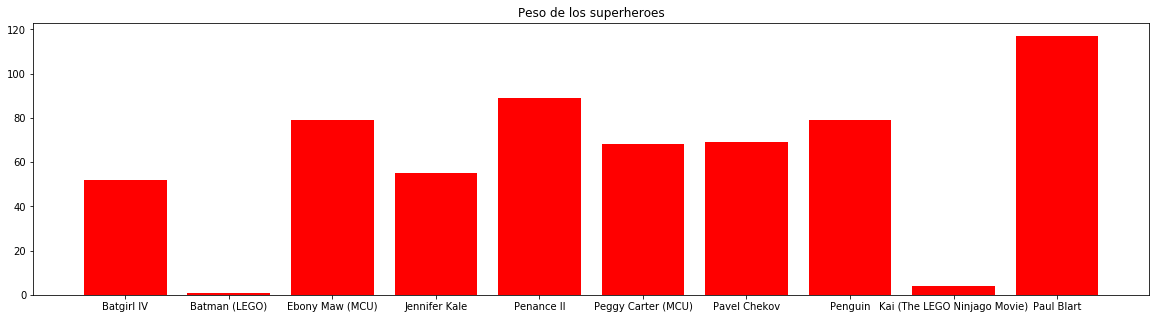

In [290]:
plt.figure(figsize=(20,5))
plt.bar(filtro2.iloc[0:10,0].values.tolist(),filtro2.iloc[0:10,5].values.tolist(),color='r')
plt.title('Peso de los superheroes')

In [288]:
filtro2.iloc[:,[0,5]]

,name,weight
5,Batgirl IV,52.0
6,Batman (LEGO),1.0
10,Ebony Maw (MCU),79.0
23,Jennifer Kale,55.0
48,Penance II,89.0
51,Peggy Carter (MCU),68.0
55,Pavel Chekov,69.0
56,Penguin,79.0
57,Kai (The LEGO Ninjago Movie),4.0
58,Paul Blart,117.0


### Peso máximo de superheroes

In [57]:
data1.weight.max()

920.0

In [291]:
data1[data1['weight']==920].iloc[:,[0,5]]

,name,weight
916,Korg,920.0


### Superheroes genero masculino y femenino

In [52]:
genderpie=data1.groupby('gender').count()

In [228]:
genderpie

,name,teams,height,race,weight,eyecolor,haircolor,fullname,alteregos,aliases,...,occupation,base,relatives,intelligence,strength,speed,durability,power,combat,superPowers
gender,,,,,,,,,,,,,,,,,,,,,
Female,584,0,584,196,316,390,396,343,584,300,...,263,239,288,274,274,274,274,274,274,479
Male,1678,0,1678,637,837,1054,1069,958,1678,940,...,743,623,690,868,868,868,868,868,868,1390


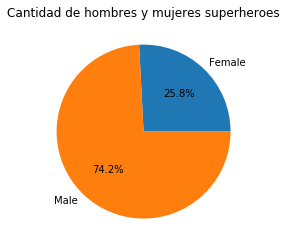

In [225]:
plt.pie(genderpie['name'], labels=genderpie.index,autopct='%1.1f%%')
plt.title('Cantidad de hombres y mujeres superheroes')
plt.show()

### Raza de superherores

In [269]:
razapie=data1.groupby('race').count()

In [274]:
razapie.iloc[:,[0]]

,name
race,
Alien,32
Alpha,1
Amazon,6
Android,20
Animal,31
Arachnid,3
Asgardian,13
Atlantean,6
Bizarro,1


name    343
dtype: int64

,name
race,
Human,343


Text(0.5, 1.0, 'Cantidad de superheroes por raza')

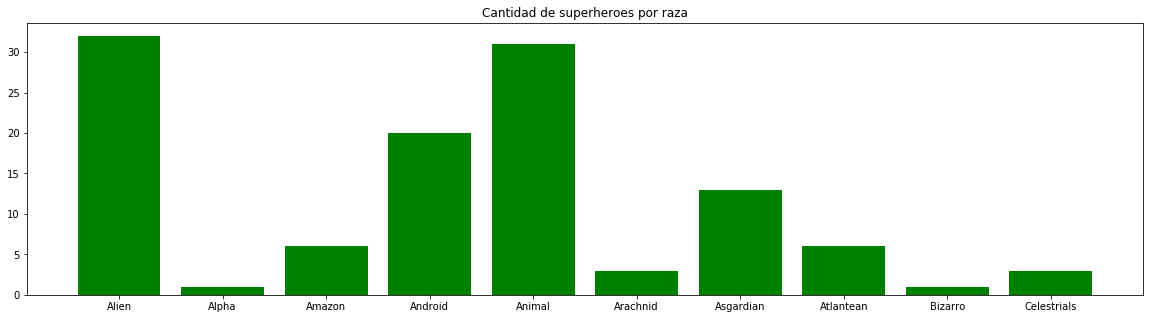

In [266]:
plt.figure(figsize=(20,5))
plt.bar(razapie2.iloc[0:10,0].index.tolist(),razapie2.iloc[0:10,0].values.tolist(),color='g')
plt.title("Cantidad de superheroes por raza")

### Raza mayoritaria

In [293]:
razapie2=razapie.iloc[:,[0]]
razapie2.max()

name    343
dtype: int64

In [294]:
razapie2[razapie['name']==343]

,name
race,
Human,343


### Color de ojos de superherores

In [311]:
colorojo=data1.groupby('eyecolor').count()

In [312]:
colorojo.iloc[:,[0]]

,name
eyecolor,
Amber,15
Black,148
Blue,494
Blue / White,6
Brown,343
Gold,9
Green,157
Green / Blue,8
Grey,28


Text(0.5, 1.0, 'Color de ojos de los superherores')

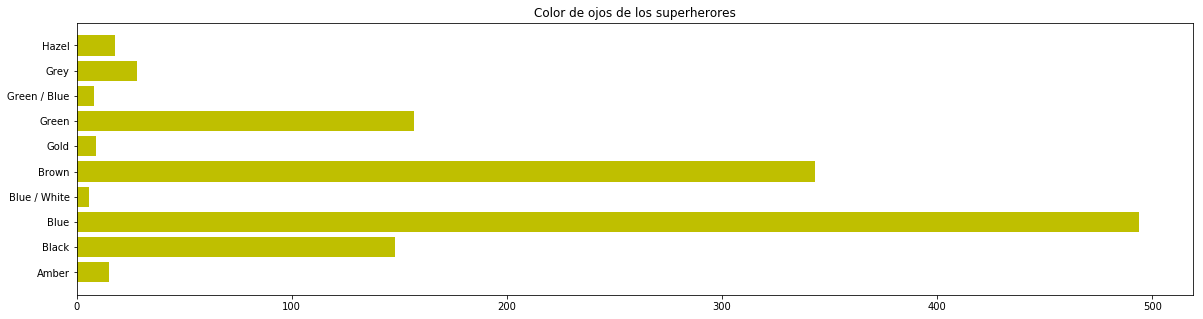

In [313]:
plt.figure(figsize=(20,5))
plt.barh(colorojo.iloc[0:10,0].index.tolist(),colorojo.iloc[0:10,0].values.tolist(),color='y')
plt.title('Color de ojos de los superherores')

### Color de ojos mayoritario

In [314]:
colorojo=colorojo.iloc[:,[0]]
colorojo.max()

name    494
dtype: int64

In [316]:
colorojo[colorojo['name']==494]

,name
eyecolor,
Blue,494


### Color de cabello

In [102]:
colorcabello=data1.groupby('haircolor').count()

In [318]:
colorcabello.iloc[:,[0]]

,name
haircolor,
Auburn,21
Black,437
Black / Blue,8
Blond,212
Blue,22
Brown,246
Brown / Black,13
Brown / White,9
Brownn,1


Text(0.5, 1.0, 'Colores de cabello')

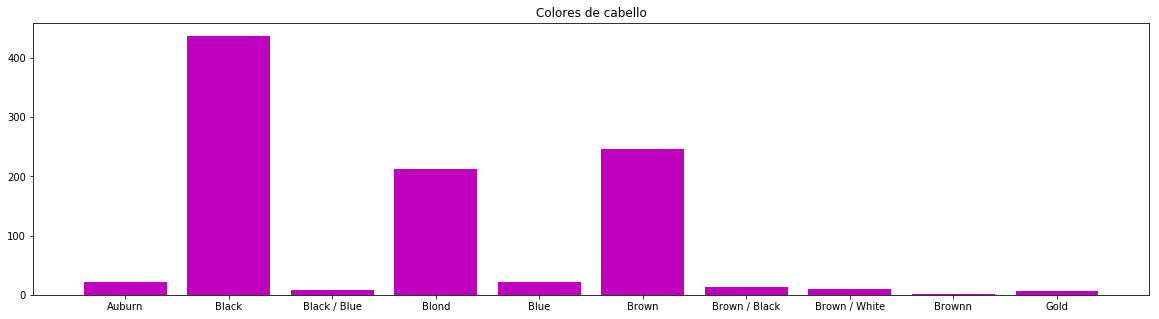

In [328]:
plt.figure(figsize=(20,5))
plt.bar(colorcabello.iloc[0:10,0].index.tolist(),colorcabello.iloc[0:10,0].values.tolist(),color='m')
plt.title('Colores de cabello')

### Color de cabello mayoritario

In [331]:
colorcabello=colorcabello.iloc[:,[0]]
colorcabello.max()

name    437
dtype: int64

In [332]:
colorcabello[colorcabello['name']==437]

,name
haircolor,
Black,437


### Habilidades de superheroes

In [62]:
dataalternativouno=dataalternativo.iloc[:,[0,17,18,19,20,21,22]]
dataalternativouno.index=dataalternativouno['name']

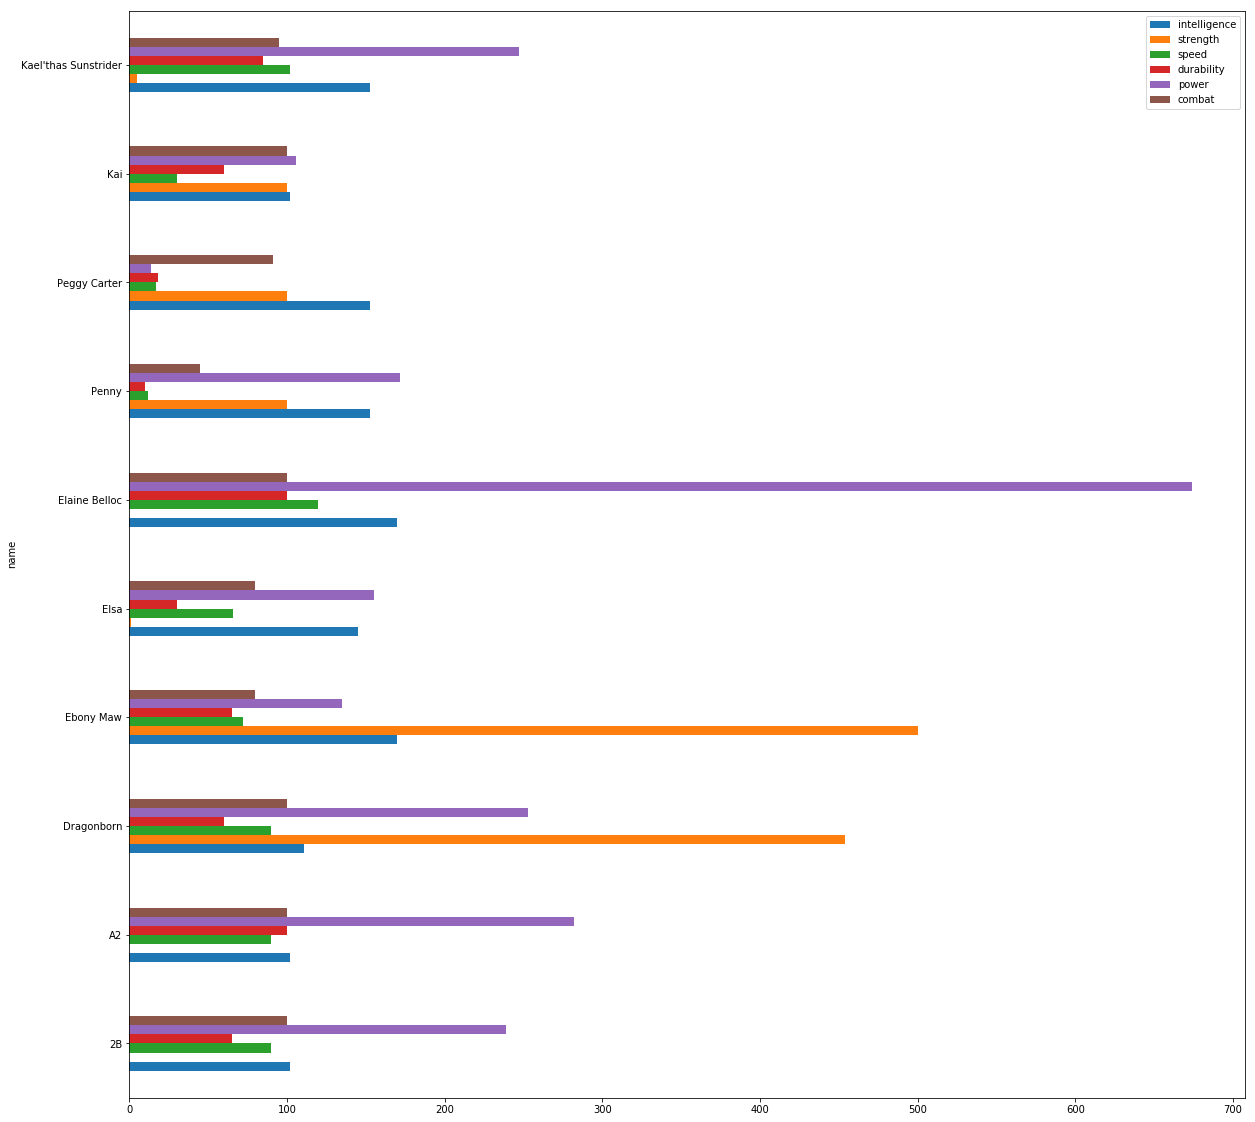

In [63]:
dataalternativodos=dataalternativouno[dataalternativouno['intelligence']!=0].head(10)
dataalternativodos.plot(kind='barh',figsize=(20, 20))


In [49]:
filtroalter1=dataalternativo[dataalternativo['intelligence']!=0]

In [153]:
filtroalter1

,name,teams,gender,height,race,weight,eyecolor,haircolor,fullname,alteregos,...,occupation,base,relatives,intelligence,strength,speed,durability,power,combat,superPowers
0,2B,NaN,Female,168,Android,0.0,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,100,282,100,"Absorption,Accelerated Healing,Agility,Duplica..."
1,A2,NaN,Female,168,Android,0.0,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,100,282,100,"Absorption,Accelerated Healing,Agility,Duplica..."
7,Dragonborn,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,111,454,90,100,282,100,"Absorption,Agility,Animal Control,Durability,E..."
12,Ebony Maw,NaN,Male,0,Alien,0.0,Blue,White,Ebony Maw,\n,...,NaN,NaN,NaN,170,500,72,100,282,100,"Accelerated Healing,Adaptation,Agility,Animal ..."
13,Elsa,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,145,1,66,100,282,100,"Cold Resistance,Element Control,Elemental Tran..."
16,Elaine Belloc,NaN,Female,0,God / Eternal,0.0,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,170,0,120,100,282,100,"Accelerated Healing,Astral Projection,Biokines..."
44,Penny,NaN,Male,0,Human,0.0,Brown,Brown,NaN,\n,...,NaN,Brakebills,NaN,153,100,12,100,282,100,"Animation,Astral Projection,Astral Travel,Cryo..."
54,Peggy Carter,NaN,Female,0,Human,0.0,NaN,NaN,Peggy Carter,\n,...,NaN,NaN,NaN,153,100,17,100,282,100,"Agility,Intelligence,Weapons Master"
65,Kai,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,102,100,30,100,282,100,"Ability Shift,Adaptation,Animal Control,Fire C..."
67,Kael'thas Sunstrider,NaN,Male,0,Elf,0.0,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,153,5,102,100,282,100,"Astral Projection,Energy Manipulation,Force Fi..."


Text(0.5, 1.0, 'Inteligencia de los superheroes')

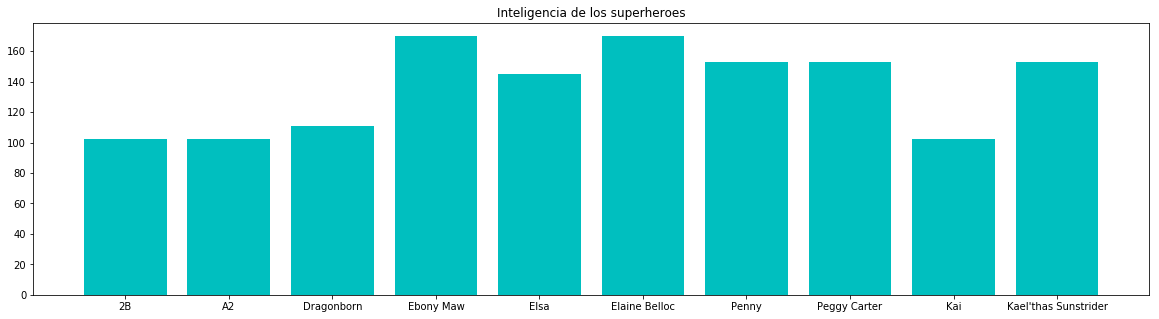

In [50]:
plt.figure(figsize=(20,5))
plt.bar(filtroalter1.iloc[0:10,0].values.tolist(),filtroalter1.iloc[0:10,17].values.tolist(),color='c')
plt.title('Inteligencia de los superheroes')

In [64]:
filtroalter2=dataalternativo[dataalternativo['strength']!=0]
filtroalter2

,name,teams,gender,height,race,weight,eyecolor,haircolor,fullname,alteregos,...,occupation,base,relatives,intelligence,strength,speed,durability,power,combat,superPowers
7,Dragonborn,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,111,454,90,60,253,100,"Absorption,Agility,Animal Control,Durability,E..."
12,Ebony Maw,NaN,Male,0,Alien,NaN,Blue,White,Ebony Maw,\n,...,NaN,NaN,NaN,170,500,72,65,135,80,"Accelerated Healing,Adaptation,Agility,Animal ..."
13,Elsa,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,145,1,66,30,155,80,"Cold Resistance,Element Control,Elemental Tran..."
44,Penny,NaN,Male,0,Human,NaN,Brown,Brown,NaN,\n,...,NaN,Brakebills,NaN,153,100,12,10,172,45,"Animation,Astral Projection,Astral Travel,Cryo..."
54,Peggy Carter,NaN,Female,0,Human,NaN,NaN,NaN,Peggy Carter,\n,...,NaN,NaN,NaN,153,100,17,18,14,91,"Agility,Intelligence,Weapons Master"
65,Kai,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,102,100,30,60,106,100,"Ability Shift,Adaptation,Animal Control,Fire C..."
67,Kael'thas Sunstrider,NaN,Male,0,Elf,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,153,5,102,85,247,95,"Astral Projection,Energy Manipulation,Force Fi..."
92,Negative Man,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,150,300,56,50,42,50,"Energy Absorption,Flight,Heat Generation,Phasi..."
101,Michelangelo,NaN,Male,0,Mutant,NaN,Blue,NaN,NaN,\n,...,NaN,NaN,"Leonardo (brother), Donatello (brother), Rapha...",140,300,60,65,59,75,"Accelerated Healing,Agility,Jump,Marksmanship,..."
102,Negan,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,School Coach (Pre-Apocalypse) Used cars salesm...,NaN,NaN,170,1,48,41,33,50,"Intelligence,Stealth,Super Strength"


Text(0.5, 1.0, 'Fortaleza de los superheroes')

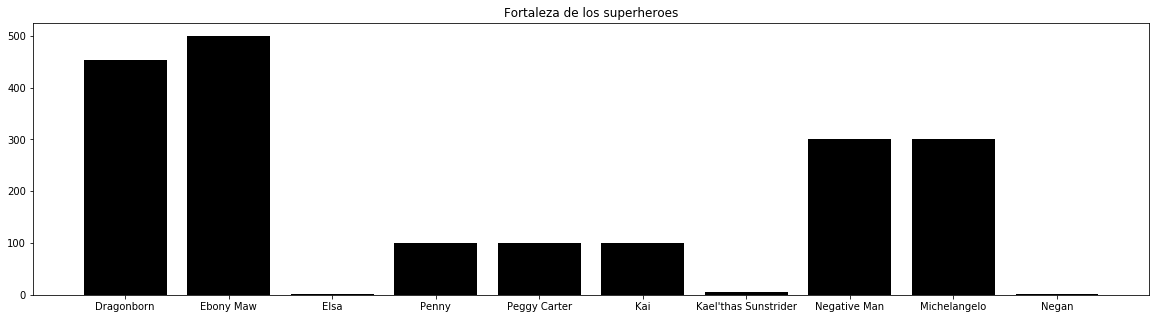

In [65]:
plt.figure(figsize=(20,5))
plt.bar(filtroalter2.iloc[0:10,0].values.tolist(),filtroalter2.iloc[0:10,18].values.tolist(),color='k')
plt.title('Fortaleza de los superheroes')

In [66]:
filtroalter3=dataalternativo[dataalternativo['speed']!=0]
filtroalter3

,name,teams,gender,height,race,weight,eyecolor,haircolor,fullname,alteregos,...,occupation,base,relatives,intelligence,strength,speed,durability,power,combat,superPowers
0,2B,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,65,239,100,"Absorption,Accelerated Healing,Agility,Duplica..."
1,A2,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,100,282,100,"Absorption,Accelerated Healing,Agility,Duplica..."
7,Dragonborn,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,111,454,90,60,253,100,"Absorption,Agility,Animal Control,Durability,E..."
12,Ebony Maw,NaN,Male,0,Alien,NaN,Blue,White,Ebony Maw,\n,...,NaN,NaN,NaN,170,500,72,65,135,80,"Accelerated Healing,Adaptation,Agility,Animal ..."
13,Elsa,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,145,1,66,30,155,80,"Cold Resistance,Element Control,Elemental Tran..."
16,Elaine Belloc,NaN,Female,0,God / Eternal,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,170,0,120,100,674,100,"Accelerated Healing,Astral Projection,Biokines..."
44,Penny,NaN,Male,0,Human,NaN,Brown,Brown,NaN,\n,...,NaN,Brakebills,NaN,153,100,12,10,172,45,"Animation,Astral Projection,Astral Travel,Cryo..."
54,Peggy Carter,NaN,Female,0,Human,NaN,NaN,NaN,Peggy Carter,\n,...,NaN,NaN,NaN,153,100,17,18,14,91,"Agility,Intelligence,Weapons Master"
65,Kai,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,102,100,30,60,106,100,"Ability Shift,Adaptation,Animal Control,Fire C..."
67,Kael'thas Sunstrider,NaN,Male,0,Elf,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,153,5,102,85,247,95,"Astral Projection,Energy Manipulation,Force Fi..."


Text(0.5, 1.0, 'Velocidad de los superheroes')

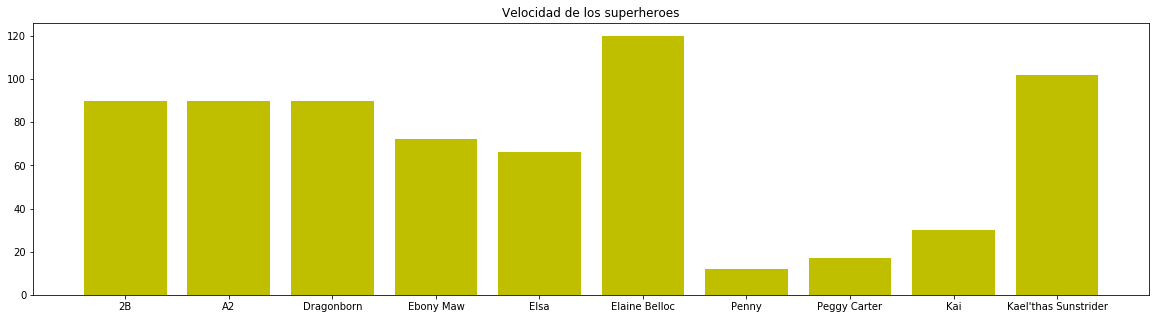

In [68]:
plt.figure(figsize=(20,5))
plt.bar(filtroalter3.iloc[0:10,0].values.tolist(),filtroalter3.iloc[0:10,19].values.tolist(),color='y')
plt.title('Velocidad de los superheroes')

In [69]:
filtroalter4=dataalternativo[dataalternativo['durability']!=0]
filtroalter4

,name,teams,gender,height,race,weight,eyecolor,haircolor,fullname,alteregos,...,occupation,base,relatives,intelligence,strength,speed,durability,power,combat,superPowers
0,2B,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,65,239,100,"Absorption,Accelerated Healing,Agility,Duplica..."
1,A2,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,100,282,100,"Absorption,Accelerated Healing,Agility,Duplica..."
7,Dragonborn,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,111,454,90,60,253,100,"Absorption,Agility,Animal Control,Durability,E..."
12,Ebony Maw,NaN,Male,0,Alien,NaN,Blue,White,Ebony Maw,\n,...,NaN,NaN,NaN,170,500,72,65,135,80,"Accelerated Healing,Adaptation,Agility,Animal ..."
13,Elsa,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,145,1,66,30,155,80,"Cold Resistance,Element Control,Elemental Tran..."
16,Elaine Belloc,NaN,Female,0,God / Eternal,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,170,0,120,100,674,100,"Accelerated Healing,Astral Projection,Biokines..."
44,Penny,NaN,Male,0,Human,NaN,Brown,Brown,NaN,\n,...,NaN,Brakebills,NaN,153,100,12,10,172,45,"Animation,Astral Projection,Astral Travel,Cryo..."
54,Peggy Carter,NaN,Female,0,Human,NaN,NaN,NaN,Peggy Carter,\n,...,NaN,NaN,NaN,153,100,17,18,14,91,"Agility,Intelligence,Weapons Master"
65,Kai,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,102,100,30,60,106,100,"Ability Shift,Adaptation,Animal Control,Fire C..."
67,Kael'thas Sunstrider,NaN,Male,0,Elf,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,153,5,102,85,247,95,"Astral Projection,Energy Manipulation,Force Fi..."


Text(0.5, 1.0, 'Durabilidad de los superheroes')

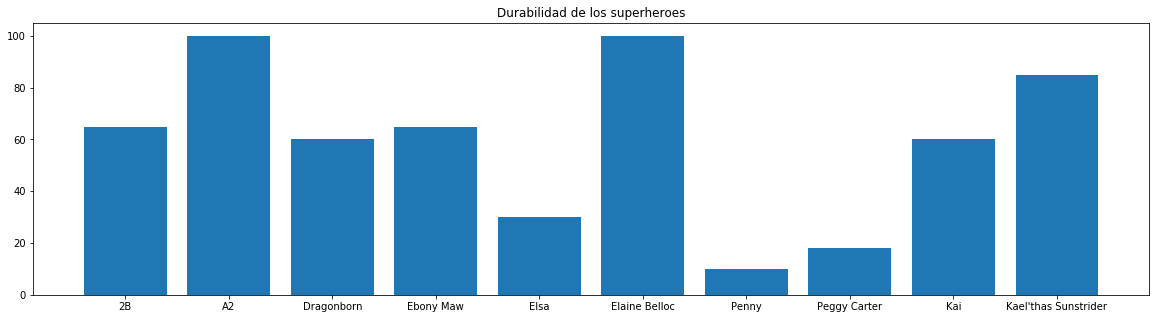

In [70]:
plt.figure(figsize=(20,5))
plt.bar(filtroalter4.iloc[0:10,0].values.tolist(),filtroalter4.iloc[0:10,20].values.tolist())
plt.title('Durabilidad de los superheroes')

In [71]:
filtroalter5=dataalternativo[dataalternativo['power']!=0]
filtroalter5

,name,teams,gender,height,race,weight,eyecolor,haircolor,fullname,alteregos,...,occupation,base,relatives,intelligence,strength,speed,durability,power,combat,superPowers
0,2B,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,65,239,100,"Absorption,Accelerated Healing,Agility,Duplica..."
1,A2,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,100,282,100,"Absorption,Accelerated Healing,Agility,Duplica..."
7,Dragonborn,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,111,454,90,60,253,100,"Absorption,Agility,Animal Control,Durability,E..."
12,Ebony Maw,NaN,Male,0,Alien,NaN,Blue,White,Ebony Maw,\n,...,NaN,NaN,NaN,170,500,72,65,135,80,"Accelerated Healing,Adaptation,Agility,Animal ..."
13,Elsa,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,145,1,66,30,155,80,"Cold Resistance,Element Control,Elemental Tran..."
16,Elaine Belloc,NaN,Female,0,God / Eternal,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,170,0,120,100,674,100,"Accelerated Healing,Astral Projection,Biokines..."
44,Penny,NaN,Male,0,Human,NaN,Brown,Brown,NaN,\n,...,NaN,Brakebills,NaN,153,100,12,10,172,45,"Animation,Astral Projection,Astral Travel,Cryo..."
53,Peek-a-Boo,NaN,Female,0,Human,NaN,NaN,NaN,Lashawn Baez,\n,...,NaN,NaN,NaN,0,0,0,0,25,0,Teleportation
54,Peggy Carter,NaN,Female,0,Human,NaN,NaN,NaN,Peggy Carter,\n,...,NaN,NaN,NaN,153,100,17,18,14,91,"Agility,Intelligence,Weapons Master"
65,Kai,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,102,100,30,60,106,100,"Ability Shift,Adaptation,Animal Control,Fire C..."


Text(0.5, 1.0, 'Poder de los superheroes')

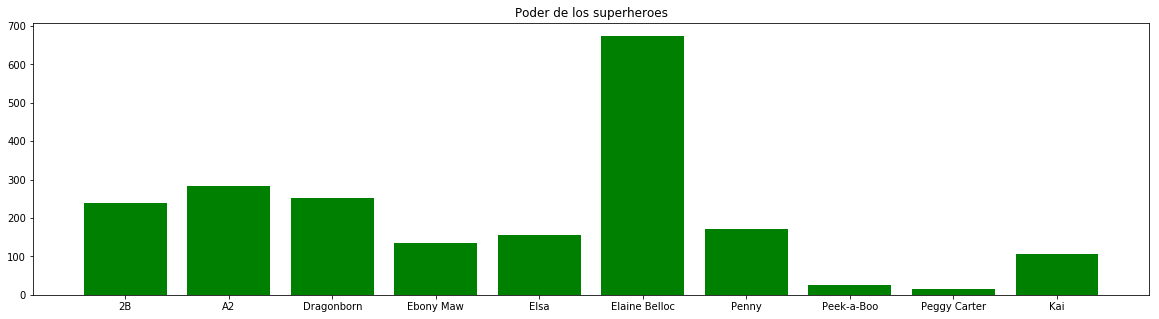

In [72]:
plt.figure(figsize=(20,5))
plt.bar(filtroalter5.iloc[0:10,0].values.tolist(),filtroalter5.iloc[0:10,21].values.tolist(),color='g')
plt.title('Poder de los superheroes')

In [73]:
filtroalter6=dataalternativo[dataalternativo['combat']!=0]
filtroalter6

,name,teams,gender,height,race,weight,eyecolor,haircolor,fullname,alteregos,...,occupation,base,relatives,intelligence,strength,speed,durability,power,combat,superPowers
0,2B,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,65,239,100,"Absorption,Accelerated Healing,Agility,Duplica..."
1,A2,NaN,Female,168,Android,NaN,Blue,Silver,NaN,\n,...,NaN,NaN,NaN,102,0,90,100,282,100,"Absorption,Accelerated Healing,Agility,Duplica..."
7,Dragonborn,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,111,454,90,60,253,100,"Absorption,Agility,Animal Control,Durability,E..."
12,Ebony Maw,NaN,Male,0,Alien,NaN,Blue,White,Ebony Maw,\n,...,NaN,NaN,NaN,170,500,72,65,135,80,"Accelerated Healing,Adaptation,Agility,Animal ..."
13,Elsa,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,145,1,66,30,155,80,"Cold Resistance,Element Control,Elemental Tran..."
16,Elaine Belloc,NaN,Female,0,God / Eternal,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,170,0,120,100,674,100,"Accelerated Healing,Astral Projection,Biokines..."
44,Penny,NaN,Male,0,Human,NaN,Brown,Brown,NaN,\n,...,NaN,Brakebills,NaN,153,100,12,10,172,45,"Animation,Astral Projection,Astral Travel,Cryo..."
54,Peggy Carter,NaN,Female,0,Human,NaN,NaN,NaN,Peggy Carter,\n,...,NaN,NaN,NaN,153,100,17,18,14,91,"Agility,Intelligence,Weapons Master"
65,Kai,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,102,100,30,60,106,100,"Ability Shift,Adaptation,Animal Control,Fire C..."
67,Kael'thas Sunstrider,NaN,Male,0,Elf,NaN,NaN,NaN,NaN,\n,...,NaN,NaN,NaN,153,5,102,85,247,95,"Astral Projection,Energy Manipulation,Force Fi..."


Text(0.5, 1.0, 'Combate de los superheroes')

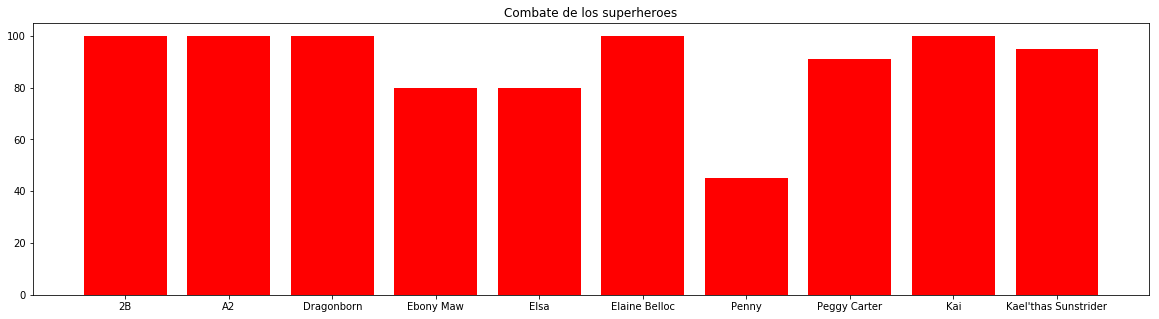

In [74]:
plt.figure(figsize=(20,5))
plt.bar(filtroalter3.iloc[0:10,0].values.tolist(),filtroalter3.iloc[0:10,22].values.tolist(),color='r')
plt.title('Combate de los superheroes')

### Correlación inteligencia y fortaleza

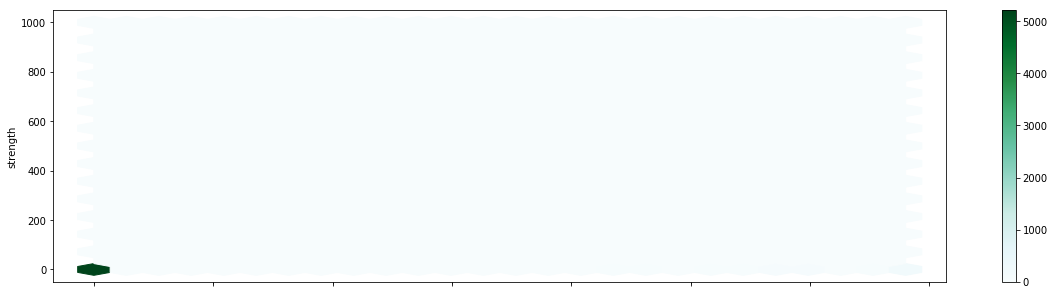

In [88]:
hexa1=dataalternativo.iloc[:,[17,18]]
hexa1.plot.hexbin(x='intelligence',y='strength',gridsize=25,figsize=(20,5))

Text(0.5, 1.0, 'Gráfico correlacional Intelligence vs Strength de superheroes')

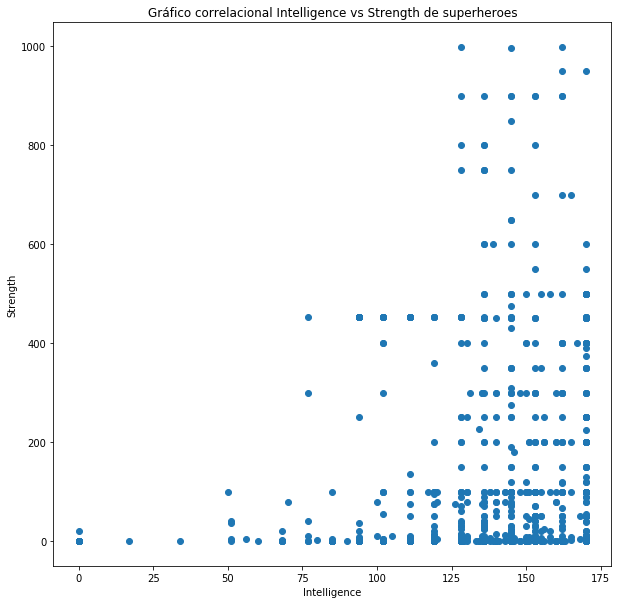

In [85]:
x=dataalternativo.iloc[0:6249,17].values.tolist()
y=dataalternativo.iloc[0:6249,18].values.tolist()
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel("Intelligence")
plt.ylabel("Strength")
plt.title("Gráfico correlacional Intelligence vs Strength de superheroes")

### Correlación entre altura y peso

Text(0.5, 1.0, 'Gráfico correlacional Estatura vs Peso de superheroes')

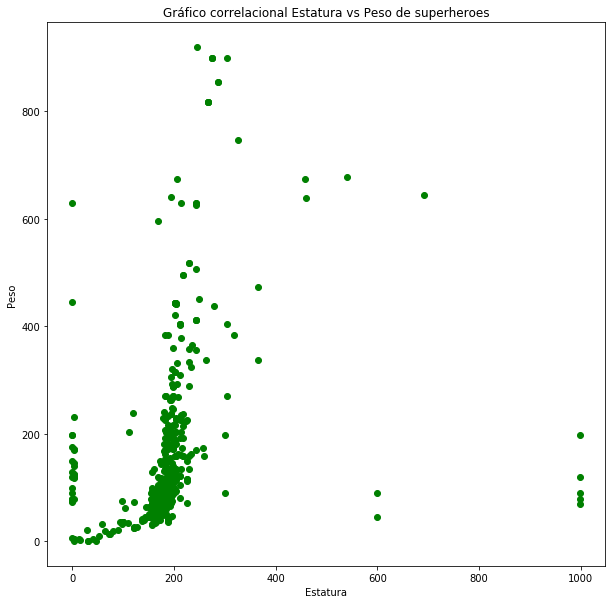

In [96]:
x2=dataalternativo.iloc[:,[3]].values.tolist()
y2=dataalternativo.iloc[:,[5]].values.tolist()
plt.figure(figsize=(10,10))
plt.scatter(x2,y2,color='g')
plt.xlabel("Estatura")
plt.ylabel("Peso")
plt.title("Gráfico correlacional Estatura vs Peso de superheroes")

### Conclusiones

Los superherores con más altura son Acronix, Bolobo, Chamille, Batman y The Great Devourer.

Hay más superheroes masculinos que femeninos. Hay 1678 hombres y 584 mujeres.

De los superheroes masculinos 1390 tienen registrados superpoderes en la base de datos analizada y de las mujeres, 479.

El superheroe con más peso es Korg.

Los superheroes tiene varias habilidades entre ellas: la inteligencia, la forteza, la rapidez, durabilidad, el poder y el combate.

De acuerdo al gráfico correlacional, no existe una relación lineal entre la inteligencia de los superheroes y su fortaleza. A pesar de esto, se puede observar una tendencia creciente, en la cual existe más posiblidades de que los superiores tenga mayor fortaleza solo cuando tienen mayor inteligencia.

Existe una baja correlación entre la estatura y el peso de los superhéroes. Se puede apreciar una tendencia creciente; pero, esta se aleja de una función lineal. A pequeñas variaciones en la estatura, se puede observar grandes variaciones con respecto al peso.

### Fuente: Base de datos de superhéroes